In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:\\Users\\USER\\Desktop\\ML_projects\\spam\\spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [7]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    return text.strip()

df['text'] = df['text'].apply(clean_text)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [12]:
from sklearn.svm import LinearSVC
model = LinearSVC()


In [13]:
model.fit(X_train, y_train)


LinearSVC()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9820627802690582
[[963   2]
 [ 18 132]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
import joblib

joblib.dump(model, 'spam_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [16]:
def predict_spam(message):
    message = clean_text(message)
    vect = vectorizer.transform([message])
    return 'Spam' if model.predict(vect)[0] else 'Ham'

predict_spam("Congratulations! You've won a free ticket to Bahamas")


'Spam'

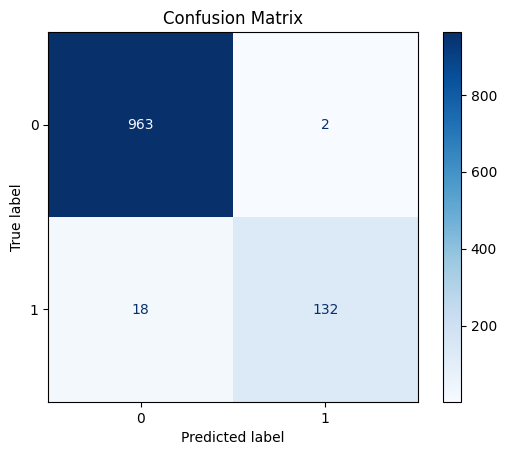

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test = true labels, y_pred = predicted labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [19]:
import numpy as np

# Assuming vectorizer is a TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()
coeffs = model.coef_[0]  # for logistic regression

top_positive_indices = np.argsort(coeffs)[-10:]  # spam-related
top_negative_indices = np.argsort(coeffs)[:10]   # ham-related

print("Top Spam Words:", feature_names[top_positive_indices])
print("Top Ham Words:", feature_names[top_negative_indices])


Top Spam Words: ['ac' 'won' 'httptms' 'ringtone' 'mobile' 'pmin' 'stop' 'claim' 'text'
 'txt']
Top Ham Words: ['ltgt' 'me' 'my' 'ill' 'ok' 'cant' 'happy' 'what' 'sir' 'he']


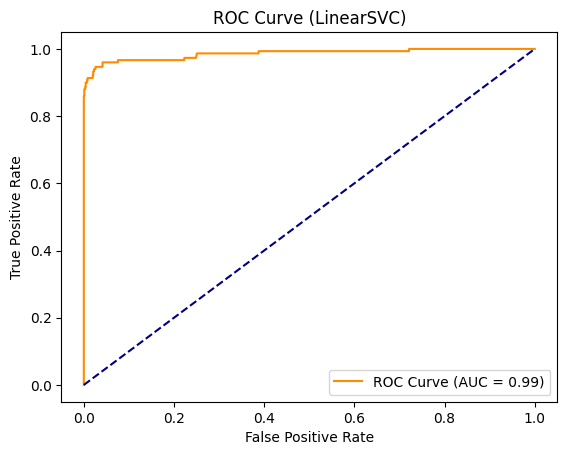

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LinearSVC)')
plt.legend()
plt.show()
